# Importação de Bibliotecas

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [188]:
warnings.filterwarnings("ignore")

# Lendo arquivo

In [137]:
df = pd.read_csv('./data/Psycological-Effects-of-COVID.csv')

# Tratamento de Dados

In [139]:
df.shape

(1175, 22)

O dataframe a ser analisado possui 1.175 linhas e 22 colunas.

In [140]:
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [141]:
df.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,Unnamed: 19,time_bp.1,travel+work
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,0.0,1175.000000,0.0
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234,NaN,7.415319,NaN
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310,NaN,2.005385,NaN
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN,4.000000,NaN
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000,NaN,5.000000,NaN
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000,NaN,7.000000,NaN
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000,NaN,9.000000,NaN
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000,NaN,12.000000,NaN


In [142]:
df.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw', 'Unnamed: 19', 'time_bp.1',
       'travel+work'],
      dtype='object')

Renomeamos as colunas para melhor entendimento e excluimos as últimas três, das quais duas não tem valor algum e a outra não é específicada.

In [143]:
df.columns = ['Idade (anos)', 'Gênero', 'Ocupação', 'Linha de Trabalho','Tempo gasto no trabalho antes da pandemia','Tempo gasto no trabalho na pandemia','Tempo de Jornada de Trabalho','Avaliação de Facilidade com Internet', 'Gosta do ambiente doméstico','Avaliação de melhora de produtividade', 'Avaliação do Ciclo do Sono', 'Ganho de Nova habilidade', 'Avaliação Conexão familiar', 'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si', 'Gosta de home office', 'Não gosta de home office', 'Prefere trabalhar em casa/trabalho', 'Gosta de trabalhar em alguns dias específicos em casa','custom1', 'custom2', 'custom3']

In [144]:
df['custom2'].unique()

array([ 7,  5,  9, 11,  4, 12])

In [145]:
df = df.drop(columns=['custom1','custom2','custom3'])

In [146]:
df.isnull().sum()

Idade (anos)                                               0
Gênero                                                     0
Ocupação                                                   0
Linha de Trabalho                                        696
Tempo gasto no trabalho antes da pandemia                  0
Tempo gasto no trabalho na pandemia                        0
Tempo de Jornada de Trabalho                               0
Avaliação de Facilidade com Internet                       0
Gosta do ambiente doméstico                                0
Avaliação de melhora de produtividade                      0
Avaliação do Ciclo do Sono                                 0
Ganho de Nova habilidade                                   0
Avaliação Conexão familiar                                 0
Avaliação de Relaxamento                                   0
Tempo ganho para cuidar de si                              0
Gosta de home office                                       0
Não gosta de home office

In [147]:
df['Gênero'] = df['Gênero'].map({"Female": "Mulher", "Male": "Homem"})

In [148]:
df['Ocupação'].unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [149]:
df['Ocupação'] = df['Ocupação'].map({"Student in College": "Universitários", "Student in School": "Estudantes de escolas", "Working Professional": "Profissionais", "Entrepreneur": "Empreendedores", "Retired/Senior Citizen": "Aposentados/Idosos", "Homemaker": "Dono/Dona de Casa", "Currently Out of Work": "Atualmente Sem Trabalho", "Medical Professional aiding efforts against COVID-19": "Médicos auxiliando ao combate contra COVID-19"})

In [150]:
df['Linha de Trabalho'].unique()

array([nan, 'Teaching', 'Engineering', 'Management', 'APSPDCL ',
       'Architecture', 'Architect', 'Other', 'Government Employee'],
      dtype=object)

In [151]:
df['Linha de Trabalho'] = df['Linha de Trabalho'].map({"Teaching": "Ensino", "Engineering": "Engenharia", "Management": "Administração", "Architecture": "Arquitetura","Architect": "Arquitetura", "Other": "Outros", "Government Employee": "Funcionário Público"})

In [152]:
NA_Trabalho = df['Linha de Trabalho'].isna().sum()
print(f' Existem {NA_Trabalho} de índividuos que não possuem a linha de trabalho identificadas.')

 Existem 697 de índividuos que não possuem a linha de trabalho identificadas.


In [153]:
df['Tempo gasto no trabalho antes da pandemia']

0        7
1        7
2        7
3        7
4        7
        ..
1170     9
1171     5
1172     9
1173    11
1174     5
Name: Tempo gasto no trabalho antes da pandemia, Length: 1175, dtype: int64

In [154]:
df['Avaliação de Facilidade com Internet'] = df['Avaliação de Facilidade com Internet'].map({1: "Sem dificuldade", 2: "Pouca dificuldade", 3: "Dificuldade moderada", 4: "Alguma dificuldade",5: "Muita dificuldade"})

In [155]:
df['Gosta do ambiente doméstico'] = df['Gosta do ambiente doméstico'].map({1: "Detesta", 2: "Não gosta", 3: "Indiferente", 4: "Gosta",5: "Gosta muito"})

In [156]:
df['Avaliação de melhora de produtividade'].unique()

array([ 0. , -0.5,  1. , -1. ,  0.5])

In [157]:
df['Avaliação do Ciclo do Sono']

0       0.0
1       0.5
2       0.0
3       1.0
4       0.0
       ... 
1170   -0.5
1171   -1.0
1172    0.5
1173    0.0
1174   -0.5
Name: Avaliação do Ciclo do Sono, Length: 1175, dtype: float64

In [158]:
df.dtypes

Idade (anos)                                              object
Gênero                                                    object
Ocupação                                                  object
Linha de Trabalho                                         object
Tempo gasto no trabalho antes da pandemia                  int64
Tempo gasto no trabalho na pandemia                        int64
Tempo de Jornada de Trabalho                             float64
Avaliação de Facilidade com Internet                      object
Gosta do ambiente doméstico                               object
Avaliação de melhora de produtividade                    float64
Avaliação do Ciclo do Sono                               float64
Ganho de Nova habilidade                                 float64
Avaliação Conexão familiar                               float64
Avaliação de Relaxamento                                 float64
Tempo ganho para cuidar de si                            float64
Gosta de home office     

In [159]:
df['Prefere trabalhar em casa/trabalho']

0       Complete Physical Attendance
1       Complete Physical Attendance
2       Complete Physical Attendance
3       Complete Physical Attendance
4       Complete Physical Attendance
                    ...             
1170    Complete Physical Attendance
1171    Complete Physical Attendance
1172    Complete Physical Attendance
1173    Complete Physical Attendance
1174            Work/study from home
Name: Prefere trabalhar em casa/trabalho, Length: 1175, dtype: object

In [160]:
df['Gosta de trabalhar em alguns dias específicos em casa'].map({'Yes' : 'Sim', 'No' : 'Não', 'Maybe' : 'Talvez'})

0          Sim
1          Não
2          Sim
3          Sim
4          Sim
         ...  
1170       Sim
1171    Talvez
1172    Talvez
1173       Sim
1174       Sim
Name: Gosta de trabalhar em alguns dias específicos em casa, Length: 1175, dtype: object

In [161]:
df_norm = df[['Avaliação do Ciclo do Sono', 'Ganho de Nova habilidade', 'Avaliação Conexão familiar', 'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si']]
df_bin = df[['Gosta de home office', 'Não gosta de home office']]

# Dados Faltantes (Missing Values)

In [162]:
df.isnull().mean()

Idade (anos)                                             0.000000
Gênero                                                   0.006809
Ocupação                                                 0.000000
Linha de Trabalho                                        0.593191
Tempo gasto no trabalho antes da pandemia                0.000000
Tempo gasto no trabalho na pandemia                      0.000000
Tempo de Jornada de Trabalho                             0.000000
Avaliação de Facilidade com Internet                     0.000000
Gosta do ambiente doméstico                              0.000000
Avaliação de melhora de produtividade                    0.000000
Avaliação do Ciclo do Sono                               0.000000
Ganho de Nova habilidade                                 0.000000
Avaliação Conexão familiar                               0.000000
Avaliação de Relaxamento                                 0.000000
Tempo ganho para cuidar de si                            0.000000
Gosta de h

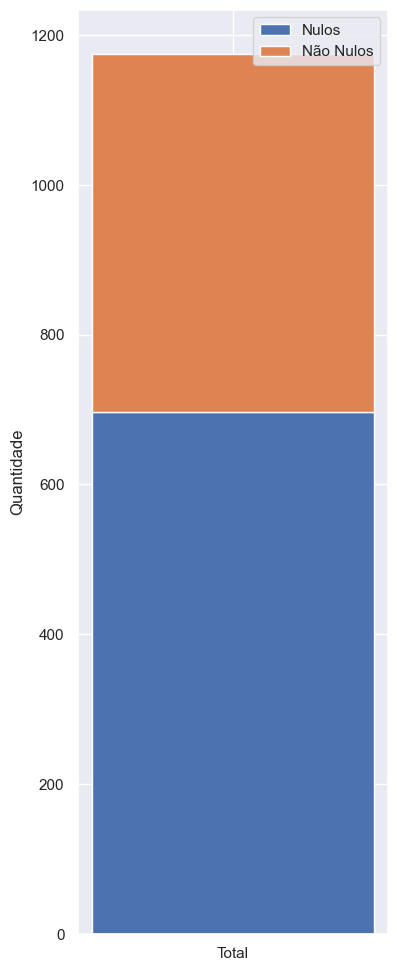

In [163]:
plt.figure(figsize=(4,12))

nulos = df['Linha de Trabalho'].isnull().sum()
N_nulos = df['Linha de Trabalho'].notnull().sum()

plt.bar('Total', nulos, label='Nulos')
plt.bar('Total', N_nulos, bottom=nulos, label='Não Nulos')

plt.ylabel('Quantidade')

plt.legend()

# Distribuição de Dados

[Text(0.5, 0, 'Idade (anos)'), Text(0, 0.5, 'Quantidade de Pessoas Avaliadas')]

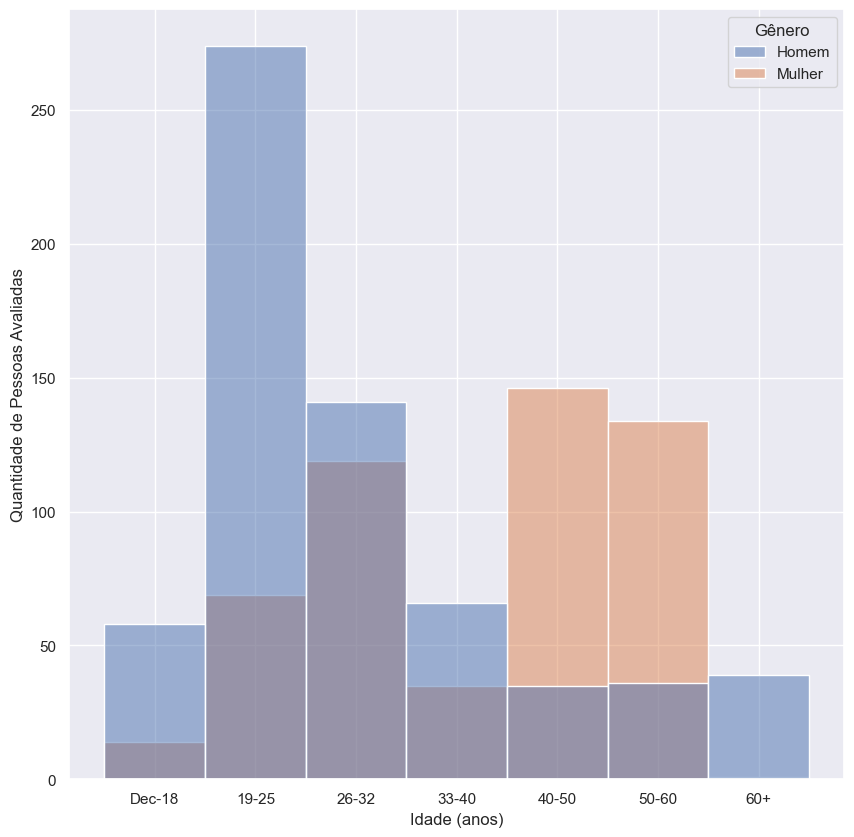

In [164]:
sns.color_palette("Set2")
df['Idade (anos)'] = pd.Categorical(df['Idade (anos)'], categories=['Dec-18','19-25', '26-32', '33-40', '40-50', '50-60', '60+'], ordered=True)
ax = sns.histplot(data=df,
                   x='Idade (anos)',
                   hue='Gênero',
                )

ax.set(xlabel='Idade (anos)', ylabel='Quantidade de Pessoas Avaliadas')

[Text(0, 0, 'Universitários'),
 Text(1, 0, 'Estudantes de escolas'),
 Text(2, 0, 'Profissionais'),
 Text(3, 0, 'Empreendedores'),
 Text(4, 0, 'Aposentados/Idosos'),
 Text(5, 0, 'Dono/Dona de Casa'),
 Text(6, 0, 'Atualmente Sem Trabalho'),
 Text(7, 0, 'Médicos auxiliando ao combate contra COVID-19')]

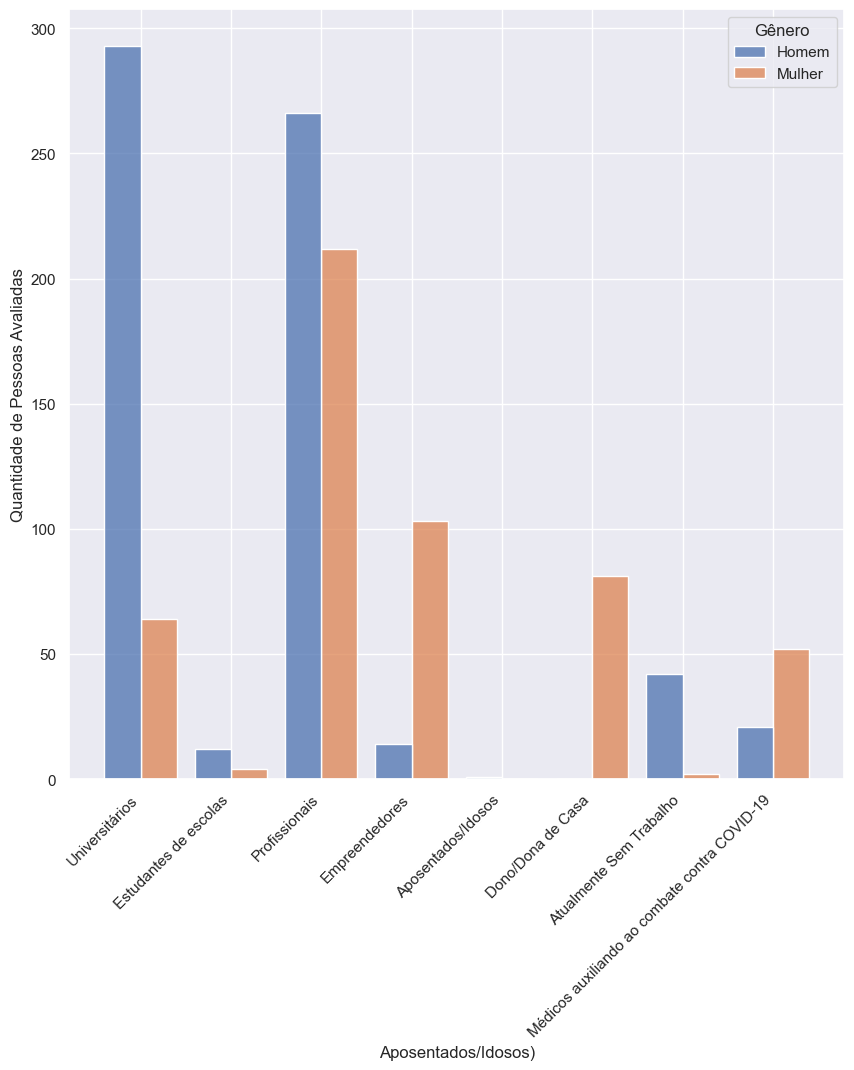

In [189]:
ax = sns.histplot(data=df,
                   x=df['Ocupação'],
                   hue='Gênero',
                   multiple="dodge",
                   shrink=0.8
                )

ax.set(xlabel='Aposentados/Idosos)', ylabel='Quantidade de Pessoas Avaliadas')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Matriz de Correlação

<Axes: >

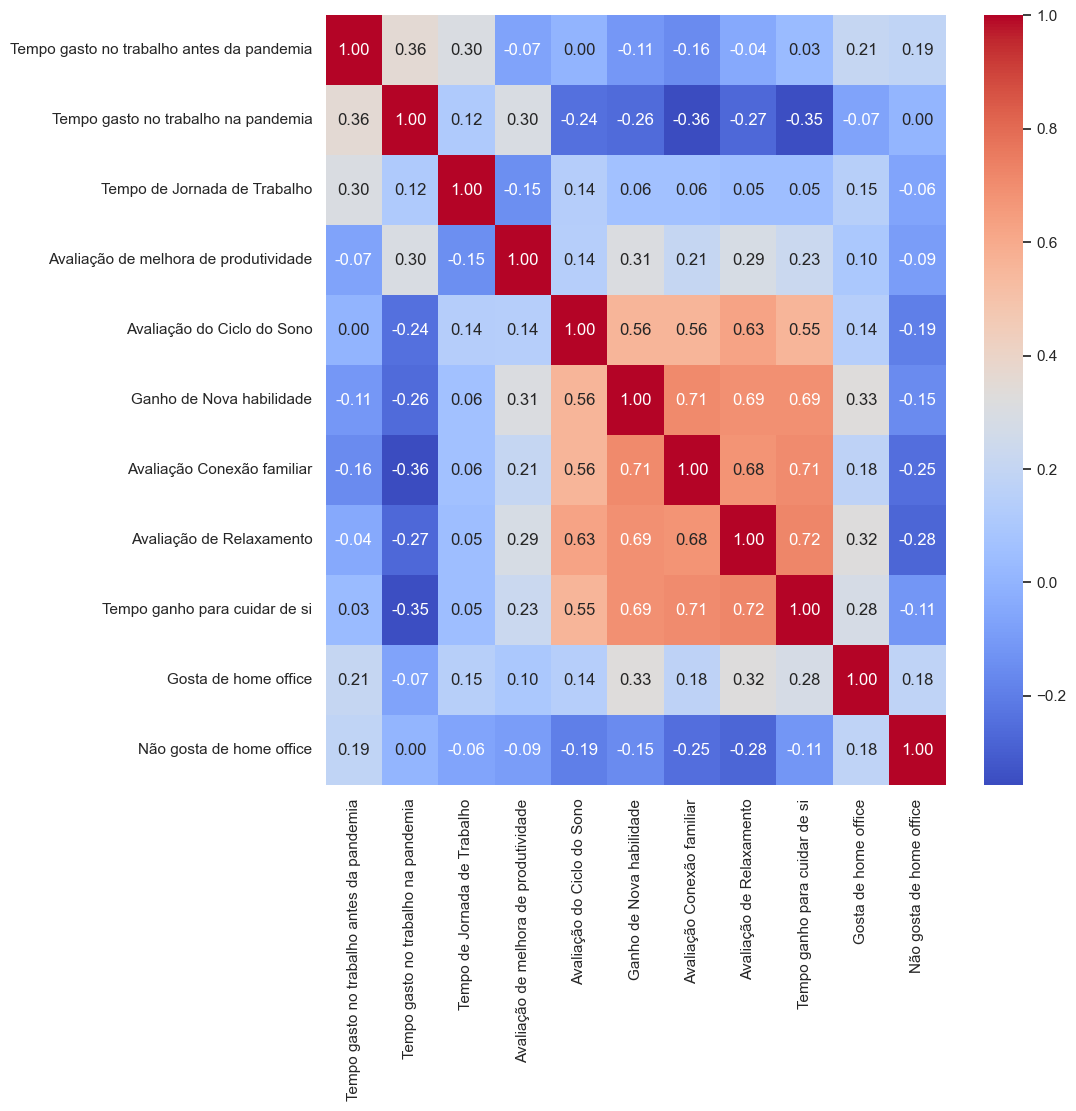

In [165]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm', fmt='.2f')

# Análise por faixa etária

In [166]:
colunas_metricas = [
    'Avaliação de melhora de produtividade',
    'Avaliação do Ciclo do Sono',
    'Ganho de Nova habilidade',
    'Avaliação de Relaxamento',
    'Avaliação Conexão familiar'
]

In [167]:
n_plots = len(colunas_metricas)
n_cols = 2

n_rows = int(np.ceil(n_plots / n_cols))
print(n_rows)

3


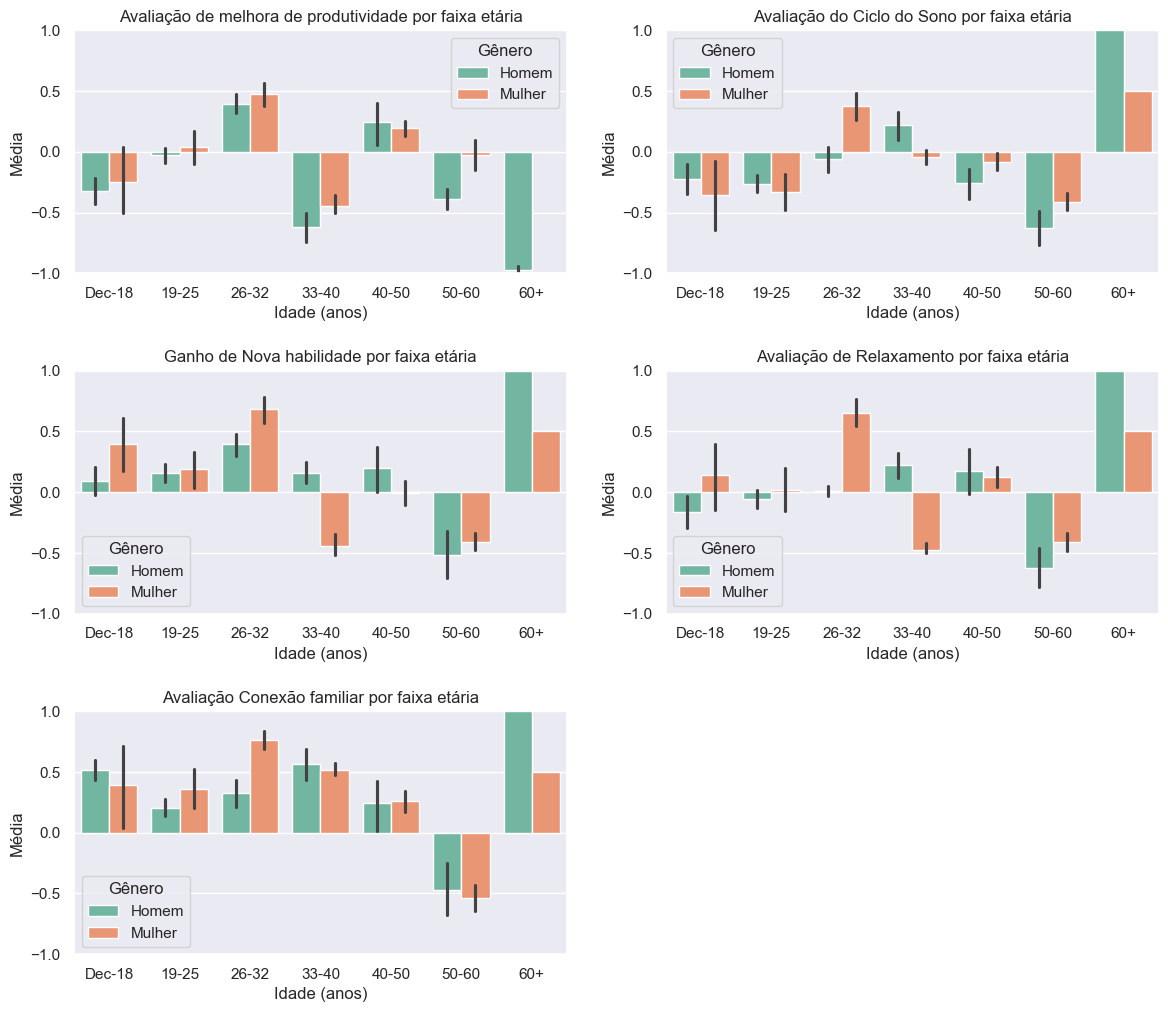

In [168]:
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14,4*n_rows))
axs = axs.flatten()
plt.subplots_adjust(hspace=0.4)

for ax, col in zip(axs.flat, colunas_metricas):
    sns.barplot(
        data=df,
        x='Idade (anos)',
        y=col,
        ax=ax,
        palette="Set2",
        hue='Gênero'
    )
    ax.set_title(f'{col} por faixa etária')
    ax.set_ylabel("Média")
    ax.set_ylim(-1.00, 1.00)
    
for ax in axs[n_plots:]:
    fig.delaxes(ax)

In [169]:
df.columns

Index(['Idade (anos)', 'Gênero', 'Ocupação', 'Linha de Trabalho',
       'Tempo gasto no trabalho antes da pandemia',
       'Tempo gasto no trabalho na pandemia', 'Tempo de Jornada de Trabalho',
       'Avaliação de Facilidade com Internet', 'Gosta do ambiente doméstico',
       'Avaliação de melhora de produtividade', 'Avaliação do Ciclo do Sono',
       'Ganho de Nova habilidade', 'Avaliação Conexão familiar',
       'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si',
       'Gosta de home office', 'Não gosta de home office',
       'Prefere trabalhar em casa/trabalho',
       'Gosta de trabalhar em alguns dias específicos em casa'],
      dtype='object')

In [170]:
df['Ocupação'].value_counts()

Ocupação
Profissionais                                    479
Universitários                                   358
Empreendedores                                   119
Dono/Dona de Casa                                 82
Médicos auxiliando ao combate contra COVID-19     73
Atualmente Sem Trabalho                           44
Estudantes de escolas                             18
Aposentados/Idosos                                 2
Name: count, dtype: int64

In [1]:
# g = sns.catplot(
#     data=df,
#     x="Idade (anos)",
#     y="Avaliação de melhora de produtividade",
#     hue="Gênero",
#     col="Ocupação",
#     kind="bar",
#     palette="Set2",
#     col_wrap=2,
#     height=4
# )

# g.set_titles("{col_name}")
# g.set_axis_labels("Idade (anos)", "Média")

# handles, labels = g._legend.legendHandles, [t.get_text() for t in g._legend.texts]

# g._legend.remove()

# for ax in g.axes.flatten():
#     ax.legend(handles, labels, title="Gênero", loc="upper left")